# Descriptive Statistics for Data Analysis

## 1. Objectives

Statistics helps us to make informed decisions based on data by identifying patterns, predicting trends, and testing hypotheses. This allows analysts to avoid making uninformed assumptions and be confident in their decision-making process.

Statistics is used in data analysis primairly for, but not limited to:
* Summarizing complex information
* Exploring and validating retnds/ patterns
* Hypothesis Testing
* Creating Probability Distributions
* Everyone's favorite 'Machine Learning' - creating data- adaptive and responsive algorithms that power ML, and AI solutions

Given our work, we will focus primarily on the first 3 uses, but if people would like to learn more about Machine Learning, feel free to let me know.

A common comment to everyone has been about documenting you code. I will not be documenting this training and will expect people to document and explain what the functions are doing; alternative, please design your own functions as you work, and document them well, you creativity and feedom of expression is much welcomed in this training exercise.



# 2. Importing Packages and Data

In [1]:
# Import important packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'center')

In [2]:
path = '...'
heart_disease_df = pd.read_csv('Heart Disease Data.csv')
help_foundation_df = pd.read_excel('HELP Foundation Data.xlsx')

heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 3. Simple Descriptive Analytics

## 3.1 Summarizing Distribution of Data

Dataframes do not make sense to most non-analytical individuals. Most individuals are often looking for a single number, a comparison of numbers or patterns in data to justify and end, which could a business goal, decision, or any metric of importance. It is important to consider what your audience is trying learn once they hand you a dataset to analyze.

### 3.1.1 Continuous Variables

Key summary statistics to keep in mind when summarizing continuous variables:
* mean, median, mode
* standard deviation
* minimum, maximum
* interquartile range

Let's find the mean age of people in the heart disease dataset:

In [3]:
print('Mean Age: ', round(heart_disease_df['age'].mean(), 2))

Mean Age:  49.58


As with previous trainings, we have seen the power of automation. Let's create a function that can produce the mean or interquartile range of a column:

In [4]:
def mean_iqr_function(df, variable, metric):
    column = df[variable]
    if metric == 'mean':
       return print('Mean: ', round(column.mean(), 1))
    else:
        q1 = round(np.quantile(column, 0.25), 1)
        q3 = round(np.quantile(column, 0.75), 1)
        iqr = q3 - q1
        return print('Interquartile Range (Q1, Q3): ', iqr, '(', q1, ', ', q3, ')')

mean_iqr_function(heart_disease_df, 'age', 'iqr')


Interquartile Range (Q1, Q3):  14.0 ( 42.0 ,  56.0 )


Modify the above function and rename to summary_statistics. Add the following new varables: median, mode, standard deviation, min and max to its logic, so the use can have more than mean and IQR as metrics:

In [18]:
#answer here
def summary_statistics(df, variable):

    column = df[variable]

    mean_value = round(column.mean(), 1)
    median_value = round(column.median(), 1)
    mode_value = column.mode().iloc[0]
    std_dev_value = round(column.std(), 1)
    min_value = round(column.min(), 1)
    max_value = round(column.max(), 1)

    q1 = round(np.quantile(column, 0.25), 1)
    q3 = round(np.quantile(column, 0.75), 1)
    iqr = q3 - q1
    
    print(f"  Interquartile Range (Q1, Q3): {iqr} ({q1}, {q3})")

summary_statistics(heart_disease_df, 'age')


  Interquartile Range (Q1, Q3): 14.0 (42.0, 56.0)


Run the describe attribute in pandas on heart disease age and describe the information you see:

In [7]:
#answer here
import pandas as pd

describe_age = heart_disease_df['age'].describe()

# Print the result
print(describe_age)


count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64


Find the summary statistics of age for males and females using one line:

In [8]:
#answer here
import pandas as pd

summary_statistics_by_gender = heart_disease_df.groupby('male')['age'].describe()

# Print the result
print(summary_statistics_by_gender)


       count    mean        std     min   25%   50%   75%   max
male                                                           
0     2419.0  49.800331  8.596856  32.0  42.0  49.0  57.0  70.0
1     1819.0  49.298516  8.533146  33.0  42.0  48.0  56.0  69.0


### 3.1.2 Categorical Variables

Categorical variables are best sumamrized using percentages. What proportion of the group has experienced an event or an outcome of interest. Consider a simple distribution of gender in the heart disease dataset:

In [9]:
print('Percent of data that is Female: ', round(100*heart_disease_df[heart_disease_df['male'] == 1].shape[0]/heart_disease_df.shape[0], 1), '%')

Percent of data that is Female:  42.9 %


Write a fucntion that returns the number of individuals meeting the criteria, and their associated percentage e.g males: 1,819 (42.9%). Name it percent_calculator, and use it to calcualte the number and percentage of patients who are current smokers. Make sure to format your numbers correctly, that is, use thousand operators accordingly e.g we should not see 1819 but rather 1,819.

HINT: f'{:,}'

In [10]:
#answer here
def percent_calculator(data_frame, condition_column, condition_value, display_name):
   
    # Filtering the DataFrame based on the condition
    subset_df = data_frame[data_frame[condition_column] == condition_value]

    # Calculate the number of individuals and percentage
    num_individuals = subset_df.shape[0]
    percentage = round(100 * num_individuals / data_frame.shape[0], 1)

    # Print the result
    print(f'Number of {display_name}: {num_individuals:,} ({percentage}%)')
    return percentage

percent_calculator(heart_disease_df, 'currentSmoker', 1, 'current smokers')


Number of current smokers: 2,094 (49.4%)


49.4

### 3.1.3 Presenting Summaries of Sumamry Statistics

The above code is great for us, but it does not really help our audience since they want to see the results as either tables or plots. We have already done both, creating tables, adn plots. Let's bring our functions and creating tables into one unit to provide our audience with summarized insights.

Let's say we have a simple objective, create a table with age, summarized, for all pateints, males and females as below:

| |All|Female|Male|
|:--:|:--:|:--:|:--:|
|Number of Patients, N||||
|Age||||
|Mean (SD)||||
|Median (IQR)||||
|Min (Max)||||

We can create a function, that represents the full table of variables we'd want to analyze, and then loop over the function for all patients, females and then males

In [11]:
def summary_statistics(df, variable, metric):
    column = df[variable]
    if metric == 'mean_sd':
       mean = round(column.mean(), 1)
       sd = round(column.std(), 1)
       mean_sd = str(mean)+' ('+str(sd)+')'
       return mean_sd
    elif metric == 'median_iqr':
        median = round(column.median(), 1)
        q1 = round(np.quantile(column, 0.25), 1)
        q3 = round(np.quantile(column, 0.75), 1)
        iqr = q3 - q1
        median_iqr = str(median)+' ('+str(iqr)+')'
        return median_iqr
    elif metric == 'min_max':
       min = round(column.min(), 1)
       max = round(column.max(), 1)
       min_max = str(min)+' ('+str(max)+')'
       return min_max
    else:
        return 'Incorrect Implementation'

In [12]:

def table_summary(df, group_name):

    table = [
        ('Number of Patients', f'{df.shape[0]:,}'),
        ('Age', ''),
        ('Mean (SD)', summary_statistics(df, 'age', 'mean_sd')),
        ('Median (IQR)', summary_statistics(df, 'age', 'median_iqr')),
        ('Min (Max)', summary_statistics(df, 'age', 'min_max'))
    ]

    columns = ['Variable', group_name]

    results = pd.DataFrame(table, columns = columns)

    return results

table_summary(heart_disease_df, 'All')

,Variable,All
0,Number of Patients,"4,238"
1,Age,
2,Mean (SD),49.6 (8.6)
3,Median (IQR),49.0 (14.0)
4,Min (Max),32 (70)


This result table can then be looped across other data, such as male data and female data to create the required table:

In [13]:
pd.concat(
    [table_summary(heart_disease_df, 'All'),
     table_summary(heart_disease_df[heart_disease_df['male'] == 0], 'Female')['Female'],
     table_summary(heart_disease_df[heart_disease_df['male'] == 1], 'Male')['Male']
     ],
    axis = 1
)

,Variable,All,Female,Male
0,Number of Patients,"4,238","2,419","1,819"
1,Age,,,
2,Mean (SD),49.6 (8.6),49.8 (8.6),49.3 (8.5)
3,Median (IQR),49.0 (14.0),49.0 (15.0),48.0 (14.0)
4,Min (Max),32 (70),32 (70),33 (69)


Update the table_summary function to include the distribution of categorical variables. Let's start by adding the distribution of gender and smoking status, using the percent_calculator function, such that our table looks as below:

| |All|Female|Male|
|:--:|:--:|:--:|:--:|
|Number of Patients, N||||
|Age||||
|Mean (SD)||||
|Median (IQR)||||
|Min (Max)||||
|Gender||||
|Female, n (%)||||
|Male, n (%)||||
|Current Smoker||||
|Yes, n (%)||||
|No, n (%)||||

In [14]:
#answer here
def table_summary(df, group_name):

    table = [
        ('Number of Patients', f'{df.shape[0]:,}'),
        ('Age', ''),
        ('Mean (SD)', summary_statistics(df, 'age', 'mean_sd')),
        ('Median (IQR)', summary_statistics(df, 'age', 'median_iqr')),
        ('Min (Max)', summary_statistics(df, 'age', 'min_max')),
        ('Gender', ''),
        ('Female, n(%)', round(100*df[df['male'] == 1].shape[0]/df.shape[0], 1)),
        ('Female, n(%)', round(100*df[df['male'] == 0].shape[0]/df.shape[0], 1)),
        ('Current Smoker', ''),
        ('Yes, n(%)', percent_calculator(df, 'currentSmoker', 1, 'Yes,n(%)')),
        ('No, n(%)', percent_calculator(df, 'currentSmoker', 0, 'Yes,n(%)'))
 
    ]

    columns = ['Variable', group_name]

    results = pd.DataFrame(table, columns = columns)

    return results

table_summary(heart_disease_df, 'All')

Number of Yes,n(%): 2,094 (49.4%)
Number of Yes,n(%): 2,144 (50.6%)


,Variable,All
0,Number of Patients,"4,238"
1,Age,
2,Mean (SD),49.6 (8.6)
3,Median (IQR),49.0 (14.0)
4,Min (Max),32 (70)
5,Gender,
6,"Female, n(%)",42.9
7,"Female, n(%)",57.1
8,Current Smoker,
9,"Yes, n(%)",49.4


# 4. Incorporating Plots Into Summary Statistics

## 4.1 Visualization of Distributions

### 4.1.1 Understanding Distribution of Data

In addition to providing a metric (specific number such as mean, median etc.) it is important to understand the distribution of data. When visualizing data, a few key items need to be taken into account:
* What is the distribution of the data?
* What is the skew of the data?
* What are the outliers in the data

and then decisions can then be made as to how to best analyze the data given the answers to the above questions.

Let's taken an example of, the distribution of child mortality in the HELP Foundation dataset:

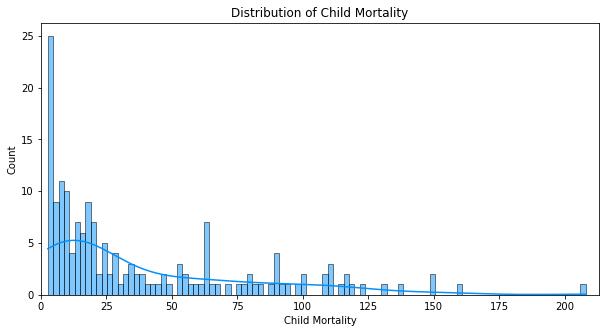

'\n1. What sort of distribution is this?\n#Log normal\n\n2. What sort of skew are you seeing in the distribution below?\n#right-skewed distribution\n\n'

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(help_foundation_df['child_mort'],bins = 100, kde = True, color = '#0091ff')
plt.xlim(0, help_foundation_df['child_mort'].max()+5)
plt.xlabel('Child Mortality')
plt.ylabel('Count')
plt.title('Distribution of Child Mortality')
plt.show()

# Please answer the following questions below:

"""
1. What sort of distribution is this?
#Log normal

2. What sort of skew are you seeing in the distribution below?
#right-skewed distribution

"""

The data above has some sort of skew, and I can see a lot of potential outliers. What mathematical/ statistical tools do we have at hand to describe outliers in our data?

Let's take a look below.

### 4.1.2 Outlier Analysis

We have a few options but some good visual tools to find outliers:
* Histogram, as seen above
* Box Plots
* Using quartile/ quantile distributions (statistical)

Lets start with box plots:

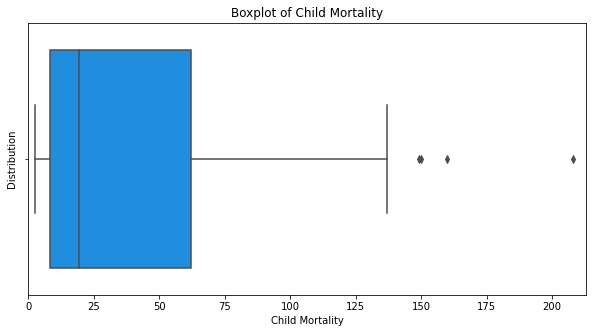

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x = help_foundation_df['child_mort'], color = '#0091ff')
plt.xlim(0, help_foundation_df['child_mort'].max()+5)
plt.xlabel('Child Mortality')
plt.ylabel('Distribution')
plt.title('Boxplot of Child Mortality')
plt.show()

We can extract these outliers statistically by using quantiles and actually see which values are the outliers. Please read more into the forumal for box plots as the logic is used below. We will create a function so we never have to repeat the process:

In [21]:
def outliers(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)

    iqr = q3 - q1

    bottom_outlier_cut_off = q1 - (1.5*iqr)
    top_outlier_cut_off = q3 + (1.5*iqr)

    #return entire dataset with outliers based on the variable of interest

    result = df[(df[variable] < bottom_outlier_cut_off) | (df[variable] > top_outlier_cut_off)].sort_values(by = variable)

    return result

outliers(help_foundation_df, 'child_mort')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662


A decision, on your part, will then have to be made as to whether you will use these outliers in your analysis or drop them entirely. This will be up to you.

The last aspect we will focus on is the visual distribution of a variable against another variable. 

### 4.1.3 Correlation

Correlation describes the relationship between a pair of variables. Correlation varies from -1 to 1 with the following definitions:
* closer to 1: high postiive correlation (increase A and B increase too)
* 0: no correlation
* closer to -1: high negative correlation (increase A and B decreases)

Generally, correlation under -0.6 and over +0.6 is considered good correlation, but it is always contextual to what you are assessing and what your goals are.

Let's start by finding the correlation between inflation and life expectancy using the Pandas corr() module:

In [25]:
help_foundation_df[['inflation', 'life_expec']].corr()

,inflation,life_expec
inflation,1.000000,-0.239705
life_expec,-0.239705,1.000000


Two methods are generally available, the Pearson's and Kendall's correlation, with pandas using the Person's as default. What's the correlation when we use endall's correlation?

In [22]:
#answer here
help_foundation_df[['inflation', 'life_expec']].corr(method='kendall')

,inflation,life_expec
inflation,1.000000,-0.290992
life_expec,-0.290992,1.000000


<Figure size 720x432 with 0 Axes>

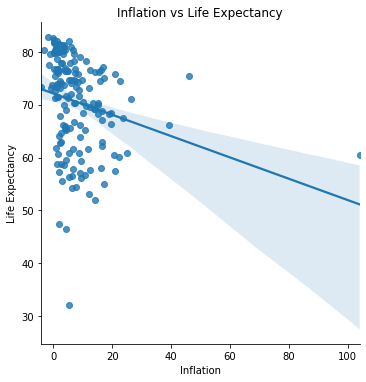

In [23]:
plt.figure(figsize=(10, 6))
sns.lmplot(x = 'inflation', y = 'life_expec', data = help_foundation_df)
plt.xlabel('Inflation')
plt.ylabel('Life Expectancy')
plt.title('Inflation vs Life Expectancy')

"""
1. What is the lmplot module in Seaborn that was used in this plot?
#Implot


2. What is the name of the line plotted on the graph below?
#regression line

""";

Plot the correlation heat map for all variables excep country in the HELP foundation dataset (make sure to annotate the correlation coefficients on the heat map):

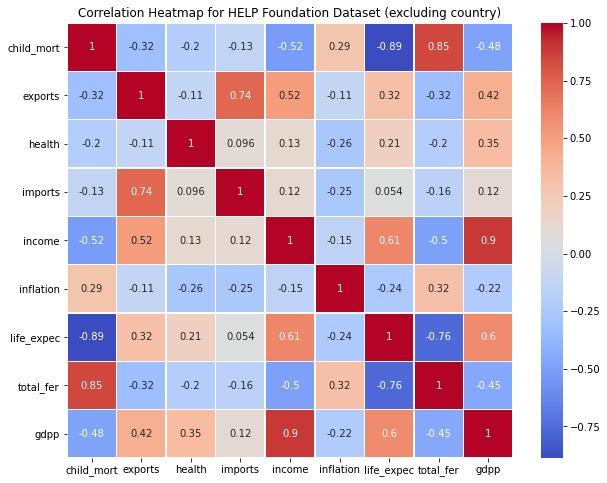

In [24]:
# answer here
# Drop the 'country' column
help_foundation_df = help_foundation_df.drop(columns=['country'])

# Calculate the correlation matrix
correlation_matrix = help_foundation_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap using seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)

# Add title
plt.title('Correlation Heatmap for HELP Foundation Dataset (excluding country)')

# Show the plot
plt.show()

"""
1. What important correlations do you see in the data?
Negative correlations



""";

## 5. Further Readings To Consider:
* Statistical Analysis in Python using Pandas: https://medium.com/analytics-vidhya/statistical-analysis-in-python-using-pandas-27c6a4209de2
* How To Visualize Descriptive Statistics Functions: https://medium.com/analytics-vidhya/how-to-visualize-pandas-descriptive-statistics-functions-480c3f2ea87c
* Finding Outliers: https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
* Correlation and Scatterplots: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html